# Titanic Dataset – Exploratory Data Analysis & Visualization

This notebook presents an exploratory data analysis of the Titanic dataset using visualization techniques.  
The aim is to understand survival patterns among passengers based on different features.  
Visualization is used to identify trends and relationships within the data.  
This analysis helps build intuition before applying machine learning models.


In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

# Read dataset
df = pd.read_csv("titanic.csv")

# Preview dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


## Dataset Overview

This section focuses on understanding the structure and contents of the Titanic dataset.  
It includes an examination of dataset shape, column names, and data types.  
Understanding the dataset is an important first step before performing analysis and visualization.


In [36]:
# Shape
print("Dataset shape:", df.shape)

# Column names and types
print("\nColumn Names and Data Types:\n", df.dtypes)

# Summary statistics
df.describe(include='all')


Dataset shape: (891, 13)

Column Names and Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
AgeGroup        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,4
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S,Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,419
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [37]:
# Missing values
missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64


## Feature Engineering and Cleaning

This step aims to enhance the dataset for effective analysis and modeling by improving data quality and structure.

- Address missing values using strategies like median, mean, or mode.
- Standardize and clean categorical features to ensure consistency.
- Transform categorical variables into numerical formats suitable for analysis or modeling.


In [38]:
# Fill missing age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing Fare if any
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Encode Sex as numeric
df['Sex_encoded'] = df['Sex'].map({'male':0, 'female':1})


## Data Visualization and Insights

The following visualizations are used to analyze survival patterns in the Titanic dataset.  
Each plot highlights relationships between passenger features and survival outcome.


## Univariate Analysis

This analysis examines each feature individually to understand its distribution and frequency.

- Explore the distribution of numerical variables using histograms, boxplots, or density plots.
- Analyze categorical variables by observing their counts or proportions through bar plots or count plots.


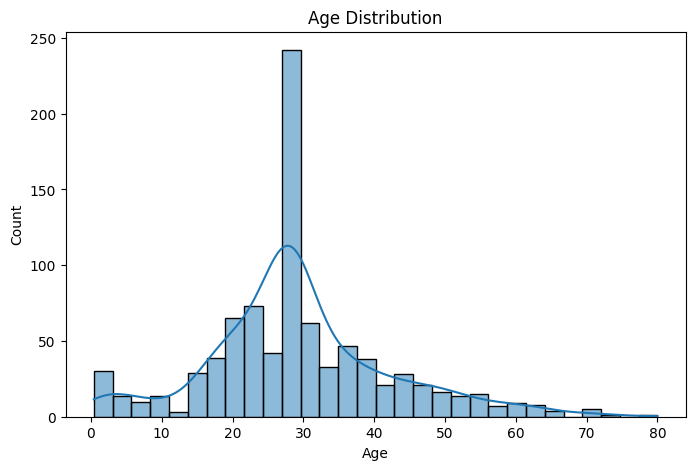

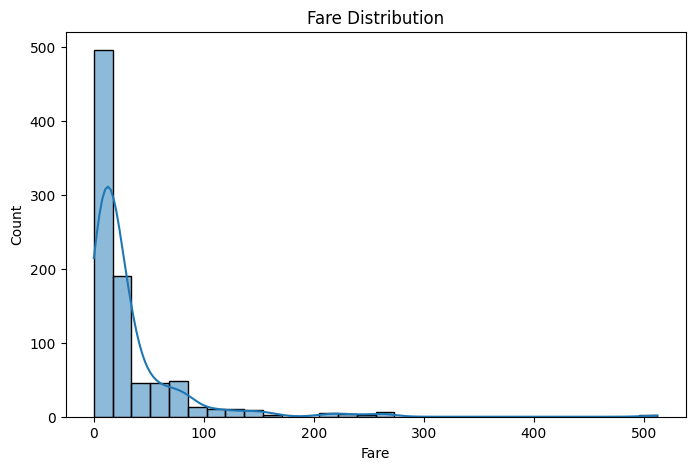

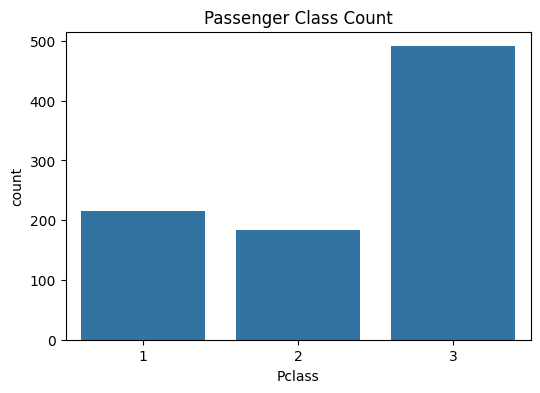

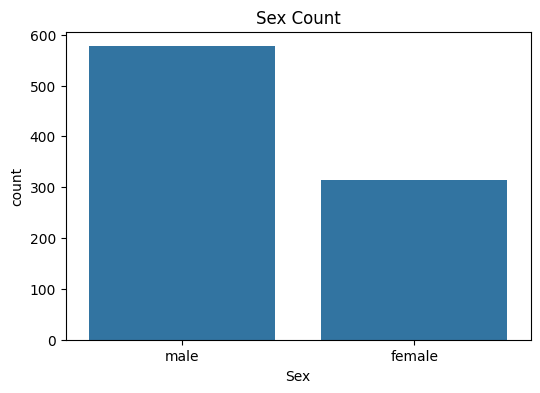

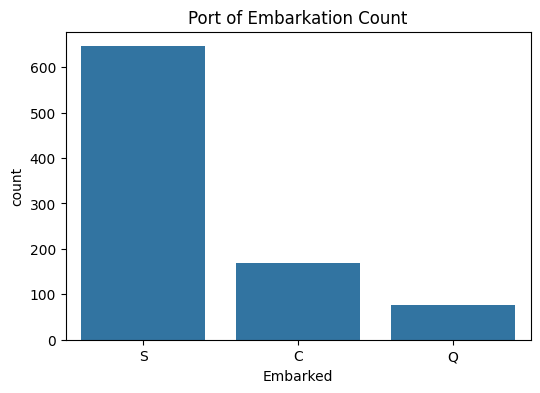

In [39]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Sex Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation Count')
plt.show()


## Bivariate Analysis (Survival vs Other Features)

Bivariate analysis examines how different features relate to the target variable Survived(0 = not survived, 1 = survived).  
Survival counts show the overall distribution of survivors and non-survivors.  
These visualizations help identify patterns and key factors influencing the probability of survival.


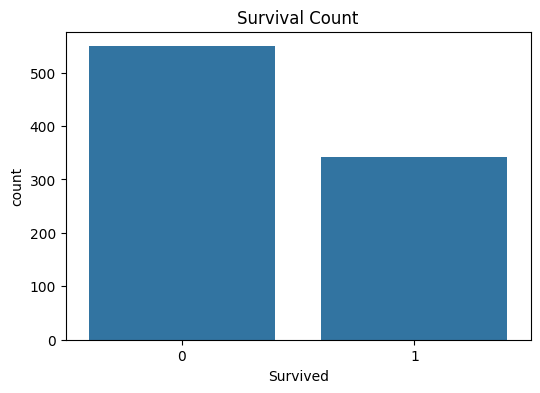

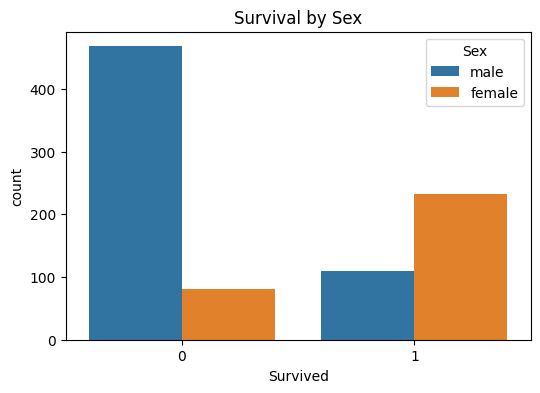

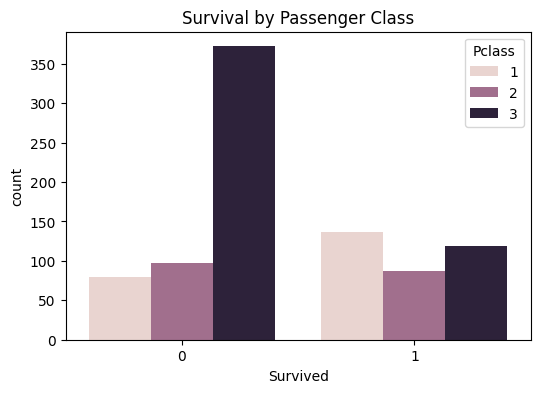

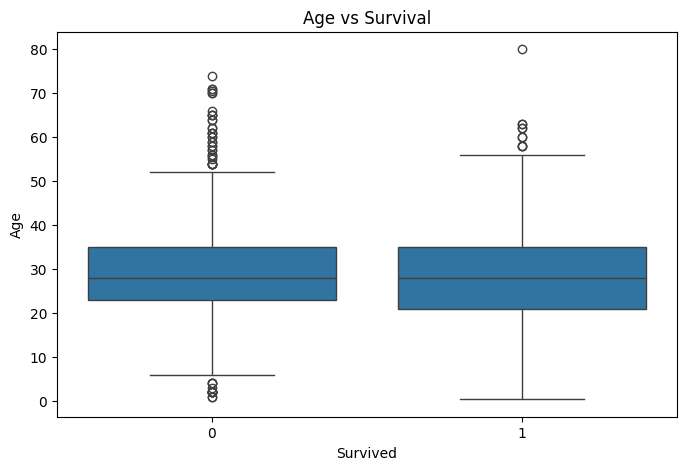

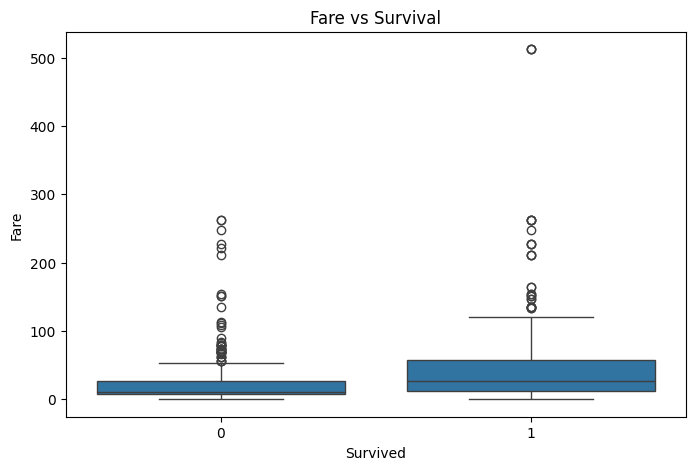

In [40]:
# Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Boxplot: Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

# Boxplot: Fare vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()


## Multivariate Analysis

Multivariate analysis is used to study relationships between multiple features at the same time.  
It helps in identifying correlations and interactions among numerical variables.  
Visualizing these relationships provides deeper insights into the dataset structure.


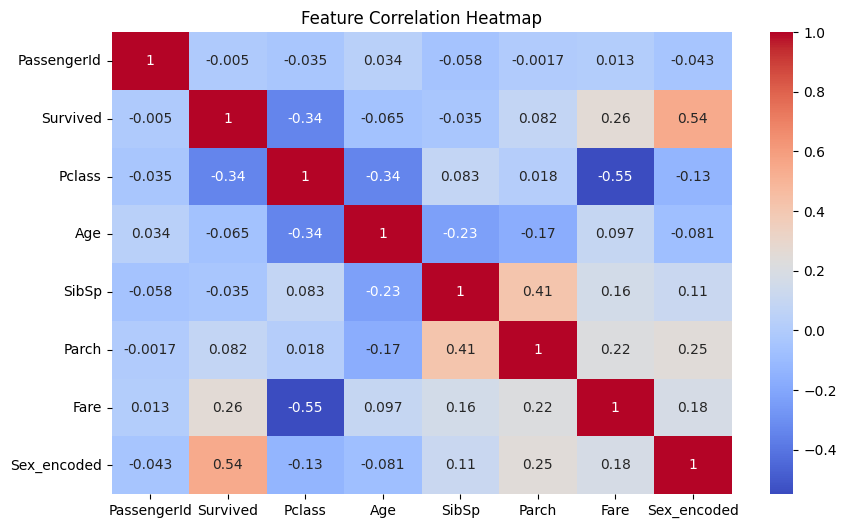

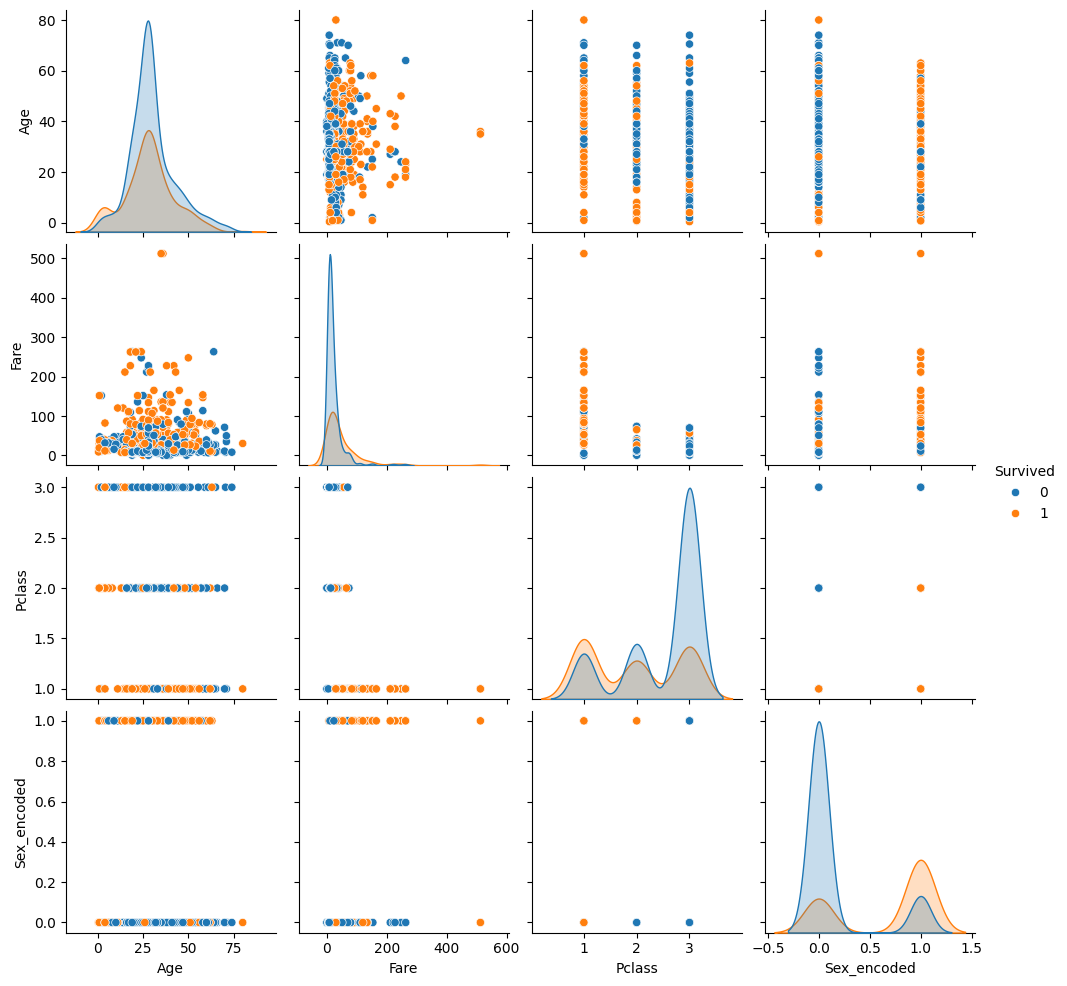

In [41]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot for selected numeric features
sns.pairplot(df[['Age','Fare','Pclass','Sex_encoded','Survived']], hue='Survived')
plt.show()


## Feature Explanation: SibSp and Parch

- **SibSp (Siblings/Spouses):** Indicates the number of siblings or spouses traveling with a passenger.  
- **Parch (Parents/Children):** Represents the number of parents or children aboard.  
These features help analyze the impact of family presence on survival chances.


## Insights / Summary

- Female passengers exhibited a significantly higher survival rate compared to males.  
- Passengers in first class (Pclass=1) had greater chances of survival than those in lower classes.  
- Younger passengers tended to have a slightly higher probability of survival.  
- Passengers who embarked from location 'C' showed a marginally higher survival rate.
- Passengers traveling with small families had better survival outcomes than those traveling alone or in large groups.  
- Higher fare payments were positively associated with survival, indicating wealthier passengers had better chances.


## Conclusion

The exploratory data analysis provided meaningful insights into the Titanic dataset and highlighted key factors affecting passenger survival.  
Visualization techniques helped uncover patterns across demographic, socio-economic, and family-related features.  
This analysis forms a strong foundation for building classification models in future.
